In [7]:
import os
# Display current working directory
print(os.getcwd())
# To make sure opencv imports .exr files
os.environ["OPENCV_IO_ENABLE_OPENEXR"] = "1"
# If the current directory is not WDSS, then set it to one level up
if os.getcwd()[-4:] != 'WDSS':
    os.chdir('..')
print(os.getcwd())

d:\College\III_year_II_part\WDSS
d:\College\III_year_II_part\WDSS


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

import tqdm

from typing import List, Tuple, Dict

from config import device, Settings
from commons import initialize

In [9]:
settings = Settings("config/config.json", "WDSSV5")
initialize(settings=settings)

Job: myassnigga, Model: WDSSV5, Device: cuda
Model path: out\myassnigga-WDSSV5\model
Log path: out\myassnigga-WDSSV5\logs


In [10]:
from network.dataset import *

# Load the dataset
dataset = WDSSDatasetCompressed(settings.train_dir, 119)

# Load the raw frames
raw_frames = dataset._get_raw_frames(3, True)

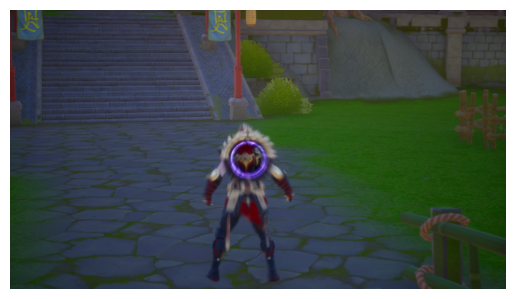

In [11]:
hr = raw_frames[RawFrameGroup.HR]
ImageUtils.display_image(hr)

100%|██████████| 476/476 [00:38<00:00, 12.48it/s]


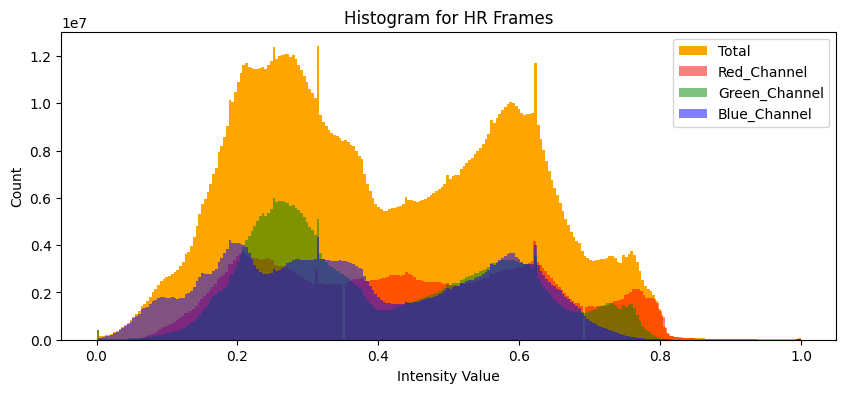

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-180.21828..156.44182].


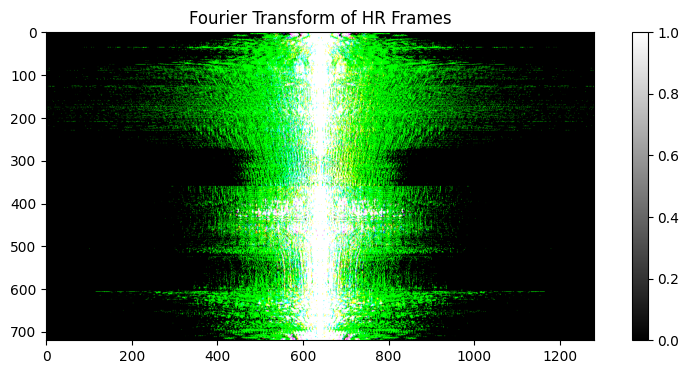

In [12]:
def plot_histogram(image, title):
    plt.figure(figsize=(10, 4))
    plt.hist(image.ravel(), bins=256, color='orange')
    plt.hist(image[:, :, 0].ravel(), bins=256, color='red', alpha=0.5)
    plt.hist(image[:, :, 1].ravel(), bins=256, color='Green', alpha=0.5)
    plt.hist(image[:, :, 2].ravel(), bins=256, color='Blue', alpha=0.5)
    plt.xlabel('Intensity Value')
    plt.ylabel('Count')
    plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.title(title)
    plt.show()

def plot_fourier_transform(image, title):
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift))
    
    plt.figure(figsize=(10, 4))
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Create a single histogram for the HR frames only
hr_images = []
for i in tqdm.tqdm(range(len(dataset))):
    raw_frames = dataset._get_raw_frames(i, True)
    image = raw_frames[RawFrameGroup.HR].cpu().numpy().transpose(1, 2, 0)
    hr_images.append(image)
# for frame_group, frame_data in raw_frames.items():
#     if frame_group == RawFrameGroup.HR:
#         image = frame_data.cpu().numpy().transpose(1, 2, 0)
#         hr_images.append(image)

hr_images = np.concatenate(hr_images, axis=0)
plot_histogram(hr_images, 'Histogram for HR Frames')

# Visualize the frequency for HR frames only
hr_image = raw_frames[RawFrameGroup.HR].cpu().numpy().transpose(1, 2, 0)
plot_fourier_transform(hr_image, 'Fourier Transform of HR Frames')
